In [635]:
from pymongo import MongoClient
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [636]:
mongo_client = MongoClient('18.229.146.168', 27017)
mongo_db = mongo_client['inatel']
mongo_collection = mongo_db['in242']

In [637]:
#df = pd.read_csv('consolidado.csv')
dados = list(mongo_collection.find())
df = pd.DataFrame(dados)

In [638]:
df.tail()

,_id,temperatura,data_coleta
10303,5dc0d559a86ebf088b5804df,25.520909,2019-11-04 22:50:17.480
10304,5dc0d55aa86ebf088b5804e0,28.633912,2019-11-04 22:50:18.481
10305,5dc0d55ba86ebf088b5804e1,18.665830,2019-11-04 22:50:19.483
10306,5dc0d55ca86ebf088b5804e2,20.045578,2019-11-04 22:50:20.484
10307,5dc0d55da86ebf088b5804e3,18.610155,2019-11-04 22:50:21.485


In [639]:
df.temperatura.count()

10308

In [640]:
df.to_csv('TrabalhoIN242.csv')

In [641]:
#df = pd.read_csv('TrabalhoIN242.csv')

In [642]:
#df = df.drop(columns=['_id'])

In [643]:
#df = df.rename(columns={'Unnamed: 0': 'Index'})

In [644]:
df = df[['data_coleta','temperatura']]

In [645]:
df.head()

,data_coleta,temperatura
0,2019-11-04 19:58:21.697,23.009051
1,2019-11-04 19:58:22.698,22.904100
2,2019-11-04 19:58:23.700,18.171301
3,2019-11-04 19:58:24.701,26.593286
4,2019-11-04 19:58:25.703,15.355377


In [646]:
def join_date(row):
    date = row['data_coleta'].split('.')[0]
    #hour = f" {row['Hour']}:00"
    return datetime.datetime.strptime(date, '%m/%d/%Y %H:%M:%s')

In [647]:
#df['data_coleta'] = df.apply(join_date, axis=1)

In [648]:
df

,data_coleta,temperatura
0,2019-11-04 19:58:21.697,23.009051
1,2019-11-04 19:58:22.698,22.904100
2,2019-11-04 19:58:23.700,18.171301
3,2019-11-04 19:58:24.701,26.593286
4,2019-11-04 19:58:25.703,15.355377
...,...,...
10303,2019-11-04 22:50:17.480,25.520909
10304,2019-11-04 22:50:18.481,28.633912
10305,2019-11-04 22:50:19.483,18.665830
10306,2019-11-04 22:50:20.484,20.045578


In [649]:
def check_temperatura(temperatura):
    if temperatura < 21:
        return 'Frio'
    if temperatura < 26:
        return 'Normal'
    return 'Quente'

In [650]:
df['sensacao'] = df['temperatura'].apply(check_temperatura)

In [651]:
df_perc = (df.groupby(['sensacao']).count()/df.temperatura.count())*100

In [652]:
df_perc.drop(['data_coleta'], axis=1, inplace=True)

In [653]:
df_perc['temperatura'].Frio

40.52192471866511

In [654]:
df_perc

,temperatura
sensacao,
Frio,40.521925
Normal,32.819170
Quente,26.658906


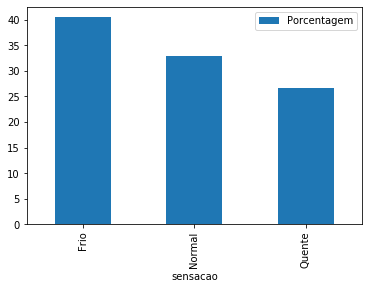

In [655]:
df_perc.plot.bar()
labels = ['Porcentagem']
plt.legend(labels)
plt.show()
#xlabel('Sensação')                           # and here ?
#ylabel('%')                                  # and here ?
#title('Porcentagem de dados por sensação')   # and here ?


In [656]:
# Em 28% do tempo a temperatura esteve fria

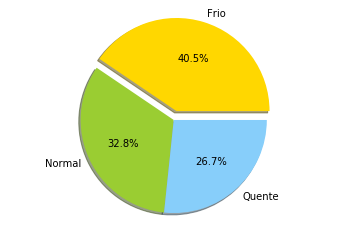

In [657]:
# Data to plot
labels = 'Frio', 'Normal', 'Quente'
sizes = [df_perc['temperatura'].Frio, df_perc['temperatura'].Normal, df_perc['temperatura'].Quente]
colors = ['gold', 'yellowgreen', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

In [658]:
df.groupby(['sensacao'])['temperatura'].mean()

sensacao
Frio      18.024205
Normal    23.465664
Quente    28.011842
Name: temperatura, dtype: float64

In [659]:
df.describe()

,temperatura
count,10308.000000
mean,22.472641
std,4.328590
min,15.001051
25%,18.698534
50%,22.423629
75%,26.241760
max,29.999873


In [660]:
[df['temperatura'].mean() - 2*df['temperatura'].std() ,df['temperatura'].mean() + 2*df['temperatura'].std() ]

[13.815461434446751, 31.129821494080623]

In [661]:
df_min = df.set_index('data_coleta').resample('min').mean().sort_values(by='temperatura', ascending=False)

In [662]:
df_min

,temperatura
data_coleta,
2019-11-04 21:27:00,23.639879
2019-11-04 21:26:00,23.621921
2019-11-04 21:41:00,23.447117
2019-11-04 22:17:00,23.425014
2019-11-04 22:47:00,23.393774
...,...
2019-11-04 20:42:00,21.354190
2019-11-04 20:44:00,21.335547
2019-11-04 22:02:00,21.322856


In [663]:
df2 = df.set_index('data_coleta').resample('min')['temperatura'].agg(['mean','min','max'])

In [664]:
df2

,mean,min,max
data_coleta,,,
2019-11-04 19:58:00,22.897934,15.355377,29.968843
2019-11-04 19:59:00,22.121107,15.017337,29.810911
2019-11-04 20:00:00,22.306281,15.109962,29.805571
2019-11-04 20:01:00,22.014110,15.349671,29.840425
2019-11-04 20:02:00,22.519053,15.231687,29.800211
...,...,...,...
2019-11-04 22:46:00,22.020090,15.146335,29.849028
2019-11-04 22:47:00,23.393774,15.079458,29.982754
2019-11-04 22:48:00,22.828557,15.132001,29.891427


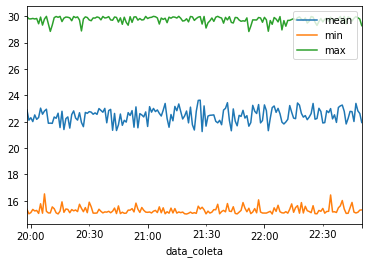

In [665]:
df2.plot()